In [124]:
import pandas as pd
import seaborn as sns

In [125]:
c = pd.read_csv('conversion_data.csv') 

## exploration ...

In [126]:
c.shape

(316200, 6)

In [127]:
c.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [128]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [129]:
c.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [130]:
c.sort_values(by='age', ascending = False).head()

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1
265167,US,79,1,Direct,1,0
192644,US,77,0,Direct,4,0
154217,US,73,1,Seo,5,0


In [131]:
# retirer les deux outliers ou l'age est > 80 ans
c.drop(c[c.age > 80].index, inplace = True)
c.reset_index()


,index,country,age,new_user,source,total_pages_visited,converted
0,0,UK,25,1,Ads,1,0
1,1,US,23,1,Seo,5,0
2,2,US,28,1,Seo,4,0
3,3,China,39,1,Seo,5,0
4,4,US,30,1,Seo,6,0
...,...,...,...,...,...,...,...
316193,316195,US,26,1,Ads,9,0
316194,316196,US,27,1,Direct,6,0
316195,316197,China,25,0,Ads,4,0
316196,316198,US,22,0,Seo,4,0


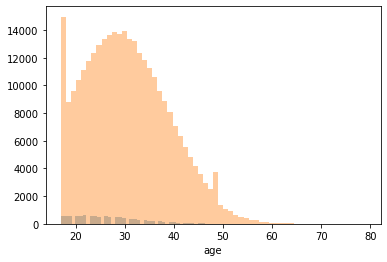

In [132]:
_ = sns.distplot(c.age[c.converted == 1], bins=60, kde=False)
_ = sns.distplot(c.age[c.converted == 0], bins=60, kde=False)


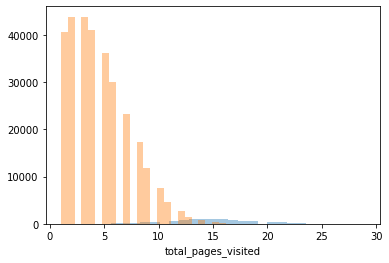

In [133]:
_ = sns.distplot(c.total_pages_visited[c.converted == 1], bins=30, kde=False)
_ = sns.distplot(c.total_pages_visited[c.converted == 0], bins=30, kde=False)

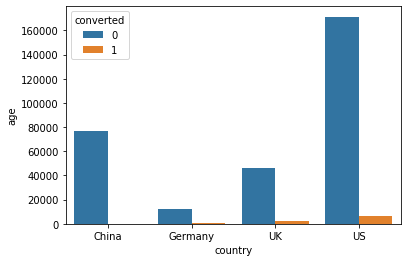

In [134]:
country = c.groupby(['country', 'converted']).count().iloc[:,0].reset_index()
_ = sns.barplot(x='country', y='age', data=country, hue='converted')

In [135]:
c.groupby(['country']).mean()

,age,new_user,total_pages_visited,converted
country,,,,
China,30.672972,0.698520,4.553523,0.001332
Germany,30.442895,0.677288,5.189966,0.062428
UK,30.449875,0.679849,5.082066,0.052612
US,30.566482,0.681985,4.930160,0.037801


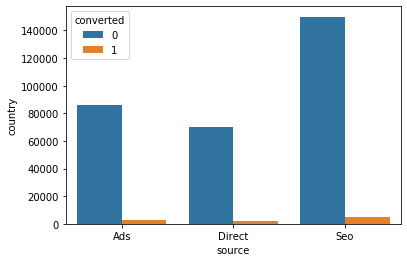

In [136]:
source = c.groupby(['source', 'converted']).count().iloc[:,0].reset_index()
_ = sns.barplot(x='source', y='country', hue='converted', data=source)

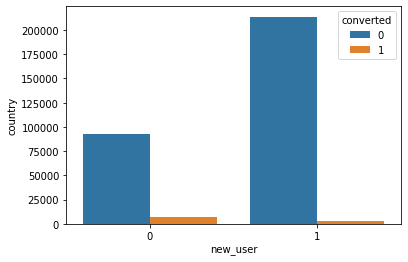

In [137]:
new_user = c.groupby(['new_user', 'converted']).count().iloc[:,0].reset_index()
_ = sns.barplot(x='new_user', y='country', data=new_user, hue='converted')

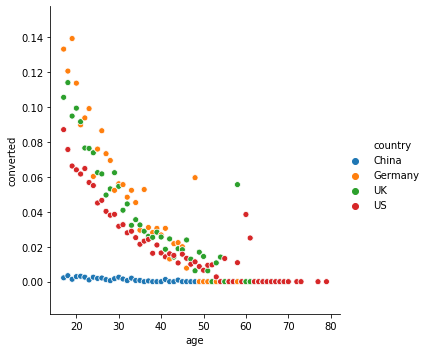

In [138]:
c[c['age'] < 55].groupby(['age' , 'country'])['converted'].mean().reset_index()
_ = sns.relplot(x='age', y='converted', hue='country', data=c.groupby(['age' , 'country'])['converted'].mean().reset_index())

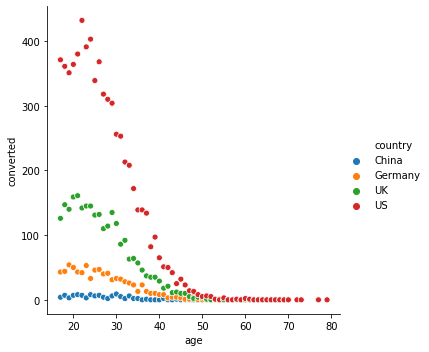

In [139]:
_ = sns.relplot(x='age', y='converted', hue='country', data=c.groupby(['age' , 'country'])['converted'].sum().reset_index())

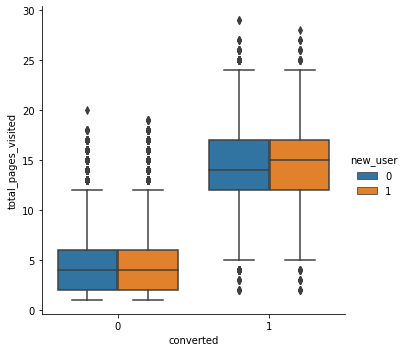

In [140]:
_ = sns.catplot(x='converted', y='total_pages_visited', data=c, kind='box', hue='new_user')

In [ ]:
#c.drop(c.query('converted == 0 and total_pages_visited > 12')['total_pages_visited'].index, inplace = True)
#c.drop(c.query('converted == 1 and total_pages_visited < 5')['total_pages_visited'].index, inplace = True)
#c.reset_index()

quelles conclusions tirer de cette première analye ? 

- la conversion est plus importante chez les jeunes 17-25, et reste fortement négativement corrèlée à l'age.

- les visiteurs de Chine sont très rarement convertis.

- le nombre de pages vues est nettement supérieur lorsque les visiteur convertissent.



## transforms ...

In [145]:
c_target = c['converted']
c_features = c.drop(columns=['converted'])

In [146]:
# dummification de country et source

c_features[['Germany','UK', 'US']] = pd.get_dummies(c_features.country, drop_first=True)
c_features[['Direct', 'Seo']] = pd.get_dummies(c.source, drop_first=True)

In [147]:
c_features = c_features.drop(columns=['country'])
c_features = c_features.drop(columns=['source'])

In [148]:
c_features.head()

,age,new_user,total_pages_visited,Germany,UK,US,Direct,Seo
0,25,1,1,0,1,0,0,0
1,23,1,5,0,0,1,0,1
2,28,1,4,0,0,1,0,1
3,39,1,5,0,0,0,0,1
4,30,1,6,0,0,1,0,1


## train / test split ...

In [149]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_validate, cross_val_score

In [169]:
X_train, X_test, y_train, y_test = train_test_split(c_features, c_target, test_size=0.2, random_state=42, stratify = c_target)

In [175]:
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())  #class_weight={0:0.2, 1:0.8}
])

pipe_lr.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logreg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [176]:
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(pipe_lr, X_train, y_train, cv=kfold)
print(results.mean())
print()
print(results)

0.9861360372025032

[0.98640101 0.98754744 0.98529412 0.98604522 0.98600569 0.98553131
 0.98659867 0.98596616 0.98620281 0.98576794]


In [177]:
y_pred = pipe_lr.predict(X_test)
acc_score = accuracy_score(pipe_lr.predict(X_test), y_test)
print("score : {}".format(acc_score))

score : 0.9862428842504743


In [178]:
# généralise bien.

# mais... pas beaucoup mieux qu'une dummy prediction (toujours converted à 0)

acc_score - (1 -y_test.values.mean())

0.018500948766603353


regarder les echantillons FP et FN
- dans cet exo, on fera attention aux FN (on prévois une non-conversion, alors qu'en fait le client achète.)
assayer de minimiser ce score FN.
- comprendre les FP (aurait du convertir), 




In [179]:
#matrice de confusion
conf_mat = pd.DataFrame({'target':y_test , 'prediction': y_pred}).reset_index()
conf_mat.groupby(['target', 'prediction']).count()

index
target prediction       
0      0           60953
       1             247
1      0             623
       1            1417

In [180]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_pred))

precision    recall  f1-score   support

           0       0.99      1.00      0.99     61200
           1       0.85      0.69      0.77      2040

    accuracy                           0.99     63240
   macro avg       0.92      0.85      0.88     63240
weighted avg       0.99      0.99      0.99     63240



In [182]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=np.array([0]*len(y_pred))))

precision    recall  f1-score   support

           0       0.97      1.00      0.98     61200
           1       0.00      0.00      0.00      2040

    accuracy                           0.97     63240
   macro avg       0.48      0.50      0.49     63240
weighted avg       0.94      0.97      0.95     63240



In [157]:
# vérifier certains échantillons

c.loc[conf_mat.query('target == 1 and prediction == 0')['index'].values] # par exemple les faux negatifs

,country,age,new_user,source,total_pages_visited,converted
250578,US,35,0,Seo,11,1
191860,US,38,1,Seo,14,1
144190,US,23,0,Ads,6,1
41461,US,25,1,Ads,14,1
84367,UK,30,1,Direct,9,1
...,...,...,...,...,...,...
169648,UK,48,0,Seo,13,1
181160,US,38,1,Seo,14,1
228452,US,18,0,Seo,9,1
113615,UK,30,1,Seo,12,1


In [158]:
coefs = pd.DataFrame(pipe_lr.named_steps['logreg'].coef_, columns=X_train.columns)
coefs

,age,new_user,total_pages_visited,Germany,UK,US,Direct,Seo
0,-0.629638,-0.818402,2.545426,0.752909,1.295609,1.610225,-0.073157,-0.011481


## calcul du ROC

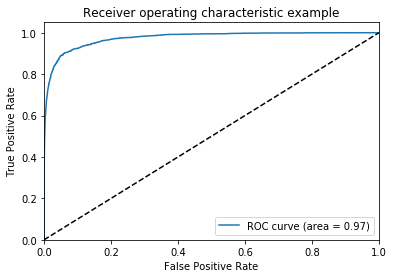

In [159]:

from sklearn.metrics import roc_curve
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

#scores = pipe_lr.named_steps['logreg'].score(X_test, y_pred)

scores = pipe_lr.named_steps['logreg'].predict_proba(X_test)


fpr, tpr, _ = roc_curve(y_test, scores[:,1])
roc_auc = metrics.auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## amélioration du modèle (hyper-params, feature eng.)


- retirer les outliers total_pages_visited
- construction d'une feature 'hit', lorsque les pages vues dépassent un seuil

=> pas de bon résultat 


In [ ]:

grid search et tuning des hyper-params

- C=0.01 amélioire un peu les perfs

- jouer sur le class_weight pour favoriser les FN vs les FP




In [161]:
#c_lite = c.copy()
#c_lite.loc[c_lite.converted == 1, 'total_pages_visited'] = c_lite.total_pages_visited - 5
#c_target = c_lite['converted']
#c_features = c_lite.drop(columns=['converted'])


c_add = c.copy()
#c_add['hit'] = c_add['total_pages_visited']
#c_add.loc[c_add.total_pages_visited > 12, 'hit'] = 1
#c_add.loc[c_add.total_pages_visited <= 11, 'hit'] = 0

c_target = c_add['converted']
c_features = c_add.drop(columns=['converted'])


In [162]:
c_features[['Germany','UK', 'US']] = pd.get_dummies(c_features.country, drop_first=True)
c_features[['Direct', 'Seo']] = pd.get_dummies(c.source, drop_first=True)
c_features.head()

,country,age,new_user,source,total_pages_visited,Germany,UK,US,Direct,Seo
0,UK,25,1,Ads,1,0,1,0,0,0
1,US,23,1,Seo,5,0,0,1,0,1
2,US,28,1,Seo,4,0,0,1,0,1
3,China,39,1,Seo,5,0,0,0,0,1
4,US,30,1,Seo,6,0,0,1,0,1


In [163]:
c_features = c_features.drop(columns=['country'])
c_features = c_features.drop(columns=['source'])
#c_features = c_features.drop(columns=['total_pages_visited'])



In [164]:
#c_features = c_features.drop(columns=['total_pages_visited'])


X_train, X_test, y_train, y_test = train_test_split(c_features, c_target, test_size=0.2, random_state=42, stratify = c_target)

pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(C=0.01, penalty='l2', class_weight={0:0.3, 1:0.7}, solver='newton-cg')) 
])

pipe_lr.fit(X_train, y_train)

kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(pipe_lr, X_train, y_train, cv=kfold)
print("scores cross validation train : {}".format(results.mean()))
print()
print("score moyen : {}".format(results))

y_pred = pipe_lr.predict(X_test)
acc_score = accuracy_score(y_pred, y_test)

print("score sur test : {}".format(acc_score))


scores cross validation train : 0.9850212283167415

score moyen : [0.98561037 0.98580803 0.98450348 0.98442441 0.9848988  0.9848988
 0.98529412 0.98485927 0.98485867 0.98505634]
score sur test : 0.9849620493358634


In [165]:
#matrice de confusion
conf_mat = pd.DataFrame({'target':y_test , 'prediction': y_pred}).reset_index()
conf_mat.groupby(['target', 'prediction']).count()

index
target prediction       
0      0           60736
       1             464
1      0             487
       1            1553

In [166]:
coefs = pd.DataFrame(pipe_lr.named_steps['logreg'].coef_, columns=X_train.columns)
coefs

,age,new_user,total_pages_visited,Germany,UK,US,Direct,Seo
0,-0.54962,-0.726107,2.290493,0.4576,0.76873,0.914304,-0.056076,-0.002976


In [167]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_pred))


precision    recall  f1-score   support

           0       0.99      0.99      0.99     61200
           1       0.77      0.76      0.77      2040

    accuracy                           0.98     63240
   macro avg       0.88      0.88      0.88     63240
weighted avg       0.98      0.98      0.98     63240



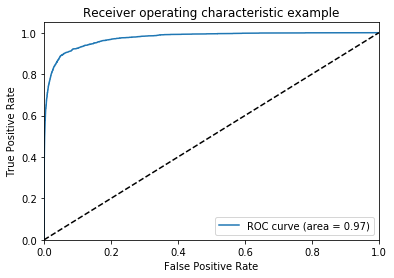

In [168]:
scores = pipe_lr.named_steps['logreg'].predict_proba(X_test)


fpr, tpr, _ = roc_curve(y_test, scores[:,1])
roc_auc = metrics.auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## conclusions

- trop de pages vues, simplifier la navigation car les visiteurs décrochent

- cibler les nouveaux visiteurs, trouver un moyen de leur faciliter la premiére conversion

